In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Define studied plots

In [10]:
monitored_run = "../results/LSTMConfig/20180319_160644-7422/"
alphasCRF = np.logspace(-3, 3, 20)

In [8]:
class RunResult(object):
    def load_los_file(self, filename):
        values = []
        with open(self.runpath + filename, 'r') as f:
            for l in f:
                values.append(float(l.strip()))
        return values
    
    def filenames(self):
        return ["dev_f1.los", "dev_losses.los", "dev_precision.los", "dev_recall.los",
                "train_f1.los", "train_losses.los", "train_precision.los", "train_recall.los"]
    
    def __init__(self, runpath):
        self.runpath = runpath
        self.results_dic = {}
        for filename in self.filenames():
            self.results_dic[filename] = self.load_los_file(filename)

In [9]:
all_results = [RunResult(monitored_run + "alpha_" + str(i) + "/") for i in range(20)]

In [16]:
all_results[2].params

{'adaptative_lr': False,
 'batch_size': 128,
 'data_train': 'data/ner_dataset.csv',
 'ee': False,
 'extra_layer': True,
 'hidden_size': 50,
 'l2': None,
 'learning_rate': 0.005,
 'model': 'lstm',
 'n_epochs': 40,
 'no_result': False,
 'other_layer_size': 20,
 'tiny': False,
 'train_fraction': 0.9,
 'vectors': 'data/en-cw.txt'}

# Plots

### Train F1 evolution per config

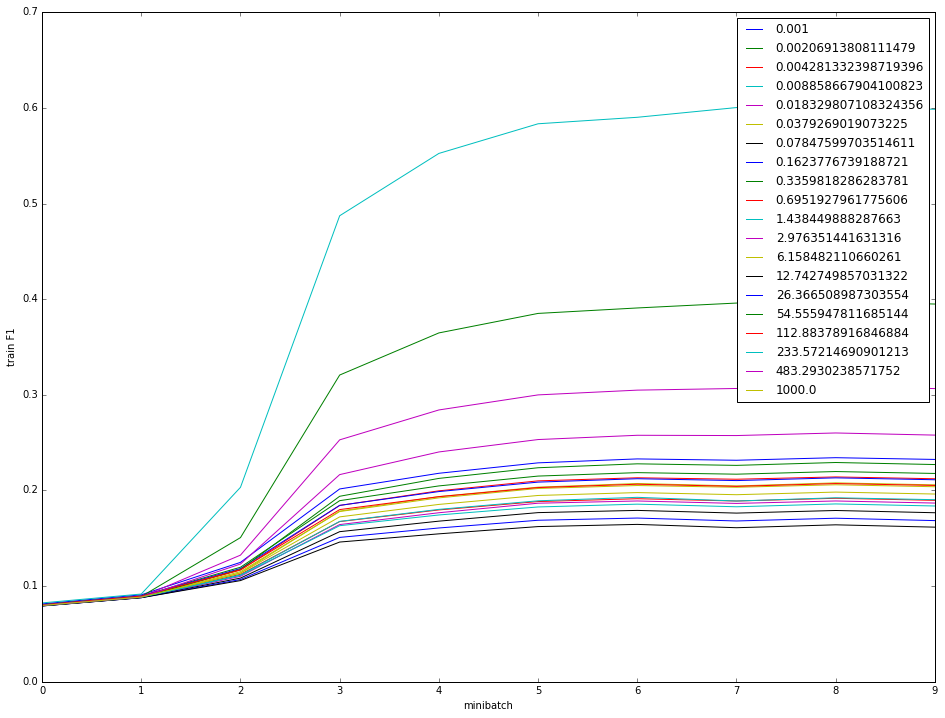

In [13]:
plt.figure(figsize = (16, 12))

for result, label in zip(all_results, alphasCRF):    
    plt.plot(result.results_dic["train_f1.los"], label = label)

plt.xlabel("minibatch")
plt.ylabel("train F1")
plt.legend()
    
plt.show()

### Dev F1 evolution per config

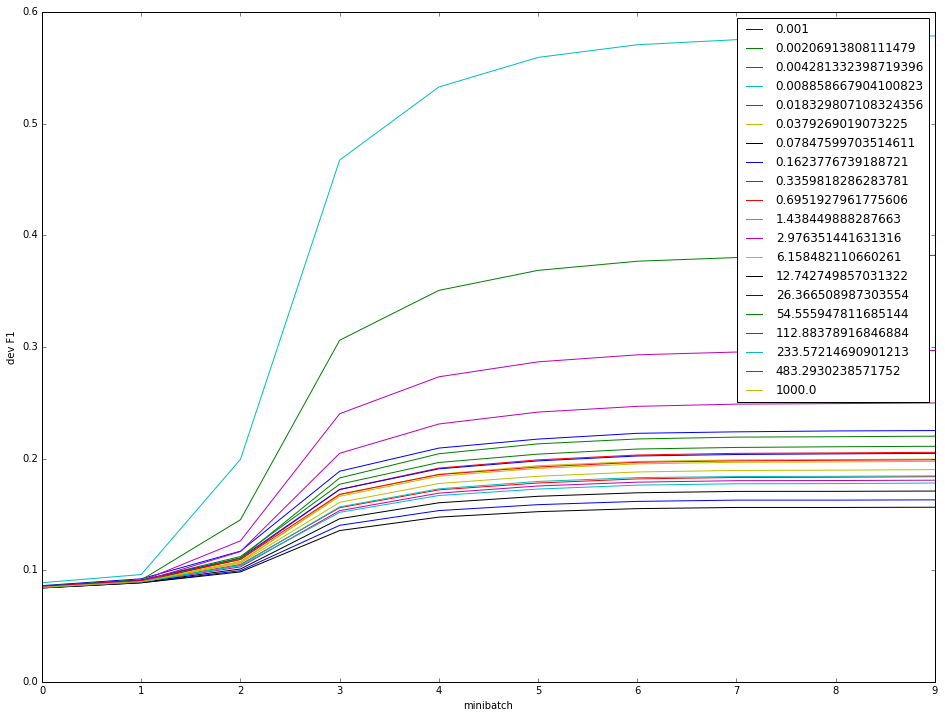

In [14]:
plt.figure(figsize = (16, 12))

for result, label in zip(all_results, alphasCRF):    
    plt.plot(result.results_dic["dev_f1.los"], label = label)

plt.xlabel("minibatch")
plt.ylabel("dev F1")
plt.legend()
    
plt.show()

### Dev F1 comparison

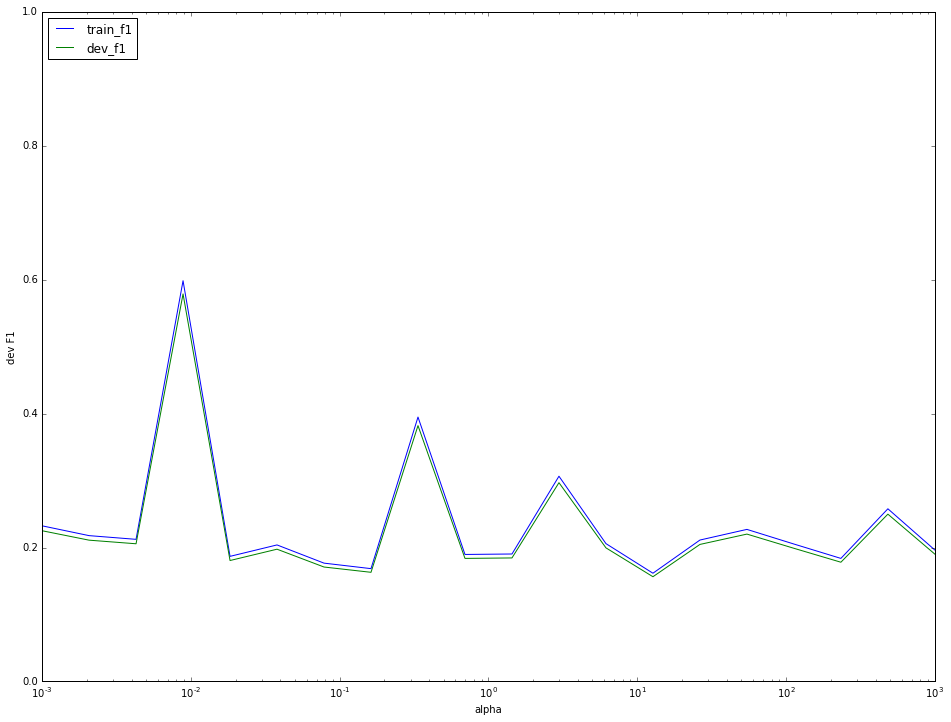

In [22]:
plt.figure(figsize = (16, 12))

train_f1_perAlpha = [result.results_dic["train_f1.los"][-1] for result in all_results]
plt.plot(alphasCRF, train_f1_perAlpha, label = "train_f1")
dev_f1_perAlpha = [result.results_dic["dev_f1.los"][-1] for result in all_results]
plt.plot(alphasCRF, dev_f1_perAlpha, label = "dev_f1")

plt.xscale("log")
plt.ylim((0, 1))
plt.xlabel("alpha")
plt.ylabel("dev F1")
plt.legend(loc="upper left")
    
plt.show()